In [127]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [128]:
outdir = "cyl_Re80.out/"

In [129]:
# Load one .txt file and return density, ux and uy
def load_file(fr):
    filename = "fr_%04d"%fr
    contents = np.loadtxt(outdir+filename+".txt")
    header = contents[0,:]
    nx = int(header[3])
    ny = int(header[4])
    i = contents[1:nx*ny+1,0]
    j = contents[1:nx*ny+1,1]
    rho = contents[1:nx*ny+1,2].reshape(ny,nx)
    ux = contents[1:nx*ny+1,3].reshape(ny,nx)
    uy = contents[1:nx*ny+1,4].reshape(ny,nx)
    X = np.arange(0,ny,1)
    Y = np.arange(0,nx,1)
    X, Y = np.meshgrid(X, Y)
    return rho,ux,uy

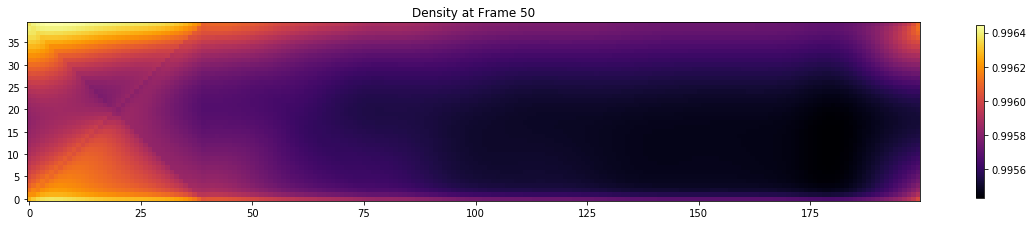

In [172]:
# This is for visualizing one frame
# First number represent frame number
# Change 0: density, 1: ux, 2: uy
fr = 50
rho=load_file(fr)[0]
fig, ax = plt.subplots(figsize=(20,8))
plt.imshow(rho,cmap=cm.inferno)
fig.gca().invert_yaxis()
plt.colorbar(shrink=0.4)
plt.title("Density at Frame %i" % fr)
plt.show()

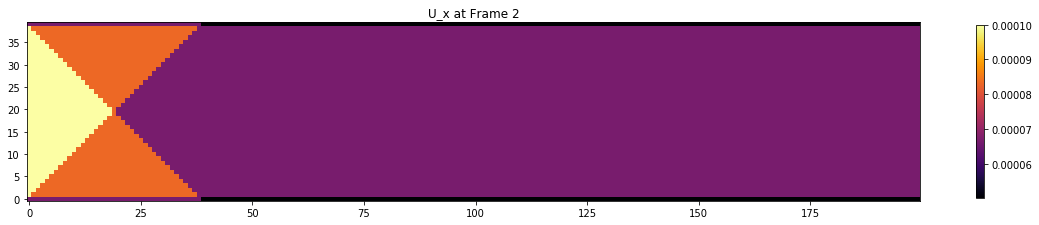

In [171]:
# This is for visualizing one frame
# First number represent frame number
# Change 0: density, 1: ux, 2: uy
fr = 2
rho=load_file(fr)[1]
fig, ax = plt.subplots(figsize=(20,8))
plt.imshow(rho,cmap=cm.inferno)
fig.gca().invert_yaxis()
plt.colorbar(shrink=0.4)
plt.title("U_x at Frame %i" % fr)
plt.show()

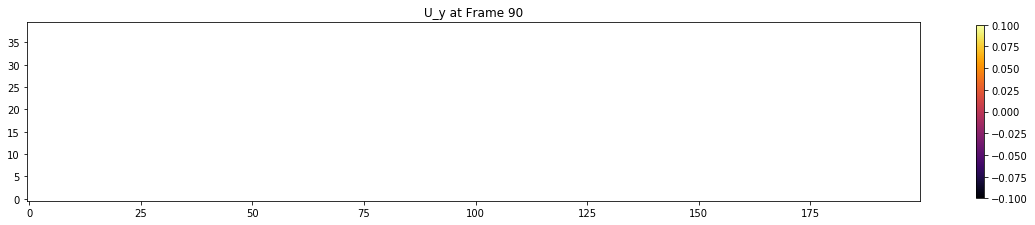

In [170]:
# This is for visualizing one frame
# First number represent frame number
# Change 0: density, 1: ux, 2: uy
fr = 90
rho=load_file(fr)[2]
fig, ax = plt.subplots(figsize=(20,8))
plt.imshow(rho,cmap=cm.inferno)
fig.gca().invert_yaxis()
plt.colorbar(shrink=0.4)
plt.title("U_y at Frame %i" % fr)
plt.show()

So the above test on an steady flow with no forcing and ux=uy=0 is correct, everything (rho, ux, uy) should be zero (one for density) throughout.

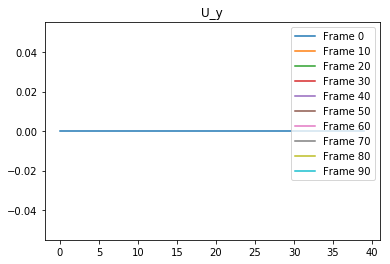

In [166]:
# For loops to plot uy at x = 0 every 10 frames
for i in range(0,100,10):
    uy=load_file(i)[2]
    plt.plot(np.arange(0,40,1),uy[:,0],label='Frame %i' % i)
plt.legend()
plt.title("U_y")
plt.show()

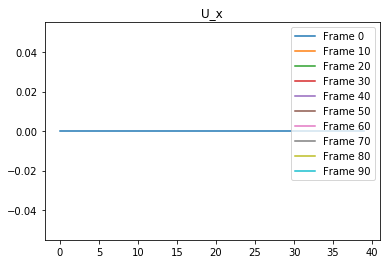

In [167]:
# For loops to plot ux at x = 0 every 10 frames
for i in range(0,100,10):
    ux=load_file(i)[2]
    plt.plot(np.arange(0,40,1),ux[:,0],label='Frame %i' % i)
plt.legend()
plt.title("U_x")
plt.show()

In [ ]:
# For loops to save % frames
for i in range(99):
    ux=load_file(i)[1]
    fig, ax = plt.subplots(figsize=(20,8))
    plt.imshow(ux)
    fig.gca().invert_yaxis()
    plt.colorbar(shrink=0.4)
    plt.title("Ux at Frame %i" % i)
    plt.savefig(outdir+'ux_%04d.png' % i)
    plt.close('all')

But if modify the forcing and ux, the whole simulation breaks. Still cannot figure out the source of bug, but it will come up eventually I believe! Fingers crossed!

In [ ]:
# Rest can be ignored, just drafts

In [ ]:
rho=load_file(20)[1]

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
plt.imshow(rho,cmap=cm.inferno)
fig.gca().invert_yaxis()
plt.colorbar(shrink=0.4)
plt.title("Density at Frame 0")
plt.show()

In [ ]:
for i in range(0,100,10):
    uy=load_file(i)[2]
    plt.plot(np.arange(0,40,1),uy[:,100],label='Frame %i' % i)
plt.legend()
plt.title("U_y")
plt.show()
    

In [ ]:
for i in range(0,100,10):
    ux=load_file(i)[1]
    plt.plot(np.arange(0,40,1),ux[:,100],label='Frame %i' % i)
plt.legend()
plt.title("U_x")
plt.show()

In [ ]:
rho.reshape(40,200)

In [ ]:
plt.plot(np.arange(0,40,1),mat[:,1])
plt.show()

In [ ]:
mat=rho.reshape(40,200)

In [ ]:
plt.imshow(mat)
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Load one .txt file and return the absolute value of velocity and density
def load_file(fr):
    filename = "fr_%04d"%fr
    contents = np.loadtxt(outdir+filename+".txt")
    header = contents[0,:]
    nxb = int(header[1])
    nyb = int(header[2])
    rho = contents[1:nxb*nyb+1,0].reshape(nyb,nxb)
    ux = contents[1:nxb*nyb+1,1].reshape(nyb,nxb)
    uy = contents[1:nxb*nyb+1,2].reshape(nyb,nxb)
    usq = np.sqrt(ux*ux+uy*uy)
    X = np.arange(0,nyb-2,1)
    Y = np.arange(0,nxb-2,1)
    X, Y = np.meshgrid(X, Y)
    return rho[1:nyb-1,1:nxb-1],uy[1:nyb-1,1:nxb-1],X,Y

In [ ]:
testrho=load_file(1)[0]

In [ ]:
# Get limits for colorbar range
def get_lims(rho,usq):
    bar_rho = np.zeros_like(rho)
    bar_rho[rho==0] = 1
    bar_rho[bar_rho==0] = np.nan
    bar_usq = np.zeros_like(usq)
    bar_usq[usq==0] = 1
    bar_usq[bar_usq==0] = np.nan
    usqmin = np.min(usq)
    usqmax = np.max(usq)
    rhomin = np.min(rho[rho>0])
    rhomax = np.max(rho)
    return bar_rho,bar_usq,usqmin,usqmax,rhomin,rhomax

In [ ]:
frames = range(10)
rho,uy = load_file(frames[-1])[0:2]
bar_rho,bar_usq,usqmin,usqmax,rhomin,rhomax = get_lims(rho,usq)

In [ ]:
for fr in range(1000):
    filename = "fr_%04d"%fr
    rho,uy = load_file(fr)
    fig, ax = plt.subplots(figsize=(15,6))
    # print("Frame: ",fr)
    # print(usq[1:ny-1,1:nx-1])
    cs = ax.imshow(uy,cmap=cm.magma)
#     ax.imshow(bar2,cmap=cm.nipy_spectral_r)
#     cs.set_clim(0,np.round(usqmax,3))
#     cbar = fig.colorbar(cs, ticks=[0,np.round(usqmax/2,3),np.round(usqmax,3)], orientation='horizontal')
#     cbar.ax.tick_params(labelsize=28)
    ax.set_xlabel(r'$x$', fontsize=16)
    ax.set_ylabel(r'$y$', fontsize=16)
    ax.set_title('Uy at Frame %04d' % fr, fontsize=20)
#     plt.show()
    plt.savefig(outdir+'uy_%04d.png' % fr)
    plt.close('all')

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
cs = ax.imshow(testrho,cmap=cm.magma)
ax.set_xlabel(r'$x$', fontsize=16)
ax.set_ylabel(r'$y$', fontsize=16)
ax.set_title('Density at Frame %04d' % 1, fontsize=20)
plt.show()

In [ ]:
0.930502+0.988407+0.965297

In [ ]:
0.930502, sum of f_eq: 0.935213
Lattice 8, sum of f: 0.988407, sum of f_eq: 0.96765
Lattice 9, sum of f: 0.965297, sum of f_eq: 0.954069
Lattice 10, sum of f: 1.03061, sum of f_eq: 1.02539
Lattice 13, sum of f: 0.90747, sum of f_eq: 0.905418
Lattice 14, sum of f: 0.884761, sum of f_eq: 0.873593
Lattice 15, sum of f: 1.00448, sum of f_eq: 0.970764
Lattice 16, sum of f: 0.972232, sum of f_eq: 0.957461
Lattice 19, sum of f: 0.963707, sum of f_eq: 0.95694
Lattice 20, sum of f: 0.939163, sum of f_eq: 0.921939
Lattice 21, sum of f: 0.946439, sum of f_eq: 0.925086
Lattice 22, sum of f: 1.11697, sum of f_eq: 1.09768

In [ ]:
rho.shape

In [ ]:
bar_usq

In [ ]:
outdir = "cyl_Re80.out/"

# Output all frames
frames = range(10)
# Output selected frames
# frames = [0,10,20,30]

# Load one .txt file and return the absolute value of velocity and density
def load_file(fr):
	filename = "fr_%04d"%fr
	contents = np.loadtxt(outdir+filename+".txt")
	header = contents[0,:]
	nxb = int(header[1])
	nyb = int(header[2])
	rho = contents[1:nxb*nyb+1,0].reshape(nyb,nxb)
	ux = contents[1:nxb*nyb+1,1].reshape(nyb,nxb)
	uy = contents[1:nxb*nyb+1,2].reshape(nyb,nxb)
	usq = np.sqrt(ux*ux+uy*uy)
	X = np.arange(0,nyb-2,1)
	Y = np.arange(0,nxb-2,1)
	X, Y = np.meshgrid(X, Y)
	return rho[1:nyb-1,1:nxb-1],usq[1:nyb-1,1:nxb-1],X,Y

# Get limits for colorbar range
def get_lims(rho,usq):
	bar1 = np.zeros_like(rho)
	bar1[rho==0] = 1
	bar1[bar1==0] = np.nan
	bar2 = np.zeros_like(usq)
	bar2[usq==0] = 1
	bar2[bar2==0] = np.nan
	usqmin = np.min(usq)
	usqmax = np.max(usq)
	rhomin = np.min(rho[rho>0])
	rhomax = np.max(rho)
	return bar1,bar2,usqmin,usqmax,rhomin,rhomax

# Open the last frame to get colorbar limits
rho,usq = load_file(frames[-1]-1)[0:2]
bar1,bar2,usqmin,usqmax,rhomin,rhomax = get_lims(rho,usq)

for fr in frames:
	filename = "fr_%04d"%fr
	rho,usq,X,Y = load_file(fr)
	fig, ax = plt.subplots(figsize=(15,6))
	# print("Frame: ",fr)
	# print(usq[1:ny-1,1:nx-1])
	cs = ax.imshow(usq,cmap=cm.magma)
	ax.imshow(bar2,cmap=cm.nipy_spectral_r)
	cs.set_clim(0,np.round(usqmax,3))
	cbar = fig.colorbar(cs, ticks=[0,np.round(usqmax/2,3),np.round(usqmax,3)], orientation='horizontal')
	cbar.ax.tick_params(labelsize=28)
	ax.set_xlabel(r'$x$', fontsize=16)
	ax.set_ylabel(r'$y$', fontsize=16)
	ax.set_title('Velocity at Frame %04d' % fr, fontsize=20)
	plt.savefig(outdir+'%04d.png' % fr)
	plt.close('all')

In [ ]:
A = np.matrix([[1,1,1,1], [3,2,1,0], [(4/3)**3,(4/3)**2,4/3,1], [3*(4/3)**2,2*4/3,1,0]])

In [ ]:
A

In [ ]:
A = np.matrix([[0,0,0,1],[0,0,1,0],[1,1,1,1],[3,2,1,0]])

In [ ]:
A

In [ ]:
b = np.matrix([[0],[1],[0],[-1]])

In [ ]:
b = np.array([0,1,0,0])

In [ ]:
c = np.linalg.solve(A,b)

In [ ]:
c

In [ ]:
c[0]

In [ ]:
x = np.linspace(0,1,100)

In [ ]:
plt.plot(x, c[0]*x**3+c[1]*x**2+c[2]*x+c[3])
plt.plot(np.linspace(1,3,200), 0*np.linspace(1,3,200))
plt.show()

In [18]:
# Phi_1
x1 = 0
x2 = 1
A = np.matrix([[x1**3,x1**2,x1,1], [3*x1**2,2*x1,1,0], [x2**3,x2**2,x2,1], [3*x2**2,2*x2,1,0]])
b = np.array([1,0,0,0])
c1 = np.linalg.solve(A,b)
c1

array([ 2., -3.,  0.,  1.])

In [15]:
# Phi_2
x1 = 0
x2 = 1
A = np.matrix([[x1**3,x1**2,x1,1], [3*x1**2,2*x1,1,0], [x2**3,x2**2,x2,1], [3*x2**2,2*x2,1,0]])
b = np.array([0,1,0,0])
c2 = np.linalg.solve(A,b)
c2

array([ 1., -2.,  1.,  0.])

In [17]:
# Phi_3
x1 = 0
x2 = 1
A = np.matrix([[x1**3,x1**2,x1,1], [3*x1**2,2*x1,1,0], [x2**3,x2**2,x2,1], [3*x2**2,2*x2,1,0]])
b = np.array([0,0,1,0])
c3 = np.linalg.solve(A,b)
c3

array([-2.,  3.,  0.,  0.])

In [27]:
# Phi_4
x1 = 0
x2 = 1
A = np.matrix([[x1**3,x1**2,x1,1], [3*x1**2,2*x1,1,0], [x2**3,x2**2,x2,1], [3*x2**2,2*x2,1,0]])
b = np.array([0,0,0,1])
c4 = np.linalg.solve(A,b)
c4

array([ 1., -1.,  0.,  0.])

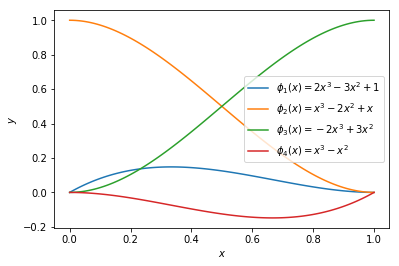

In [33]:
x = np.linspace(0,1,100)
plt.plot(x, c1[0]*x**3+c1[1]*x**2+c1[2]*x+c1[3], label=r'$\phi_1(x)=2x^3-3x^2+1$')
plt.plot(x, c2[0]*x**3+c2[1]*x**2+c2[2]*x+c2[3], label=r'$\phi_2(x)=x^3-2x^2+x$')
plt.plot(x, c3[0]*x**3+c3[1]*x**2+c3[2]*x+c3[3], label=r'$\phi_3(x)=-2x^3+3x^2$')
plt.plot(x, c4[0]*x**3+c4[1]*x**2+c4[2]*x+c4[3], label=r'$\phi_4(x)=x^3-x^2$')
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

In [ ]:
x = np.linspace(1,4/3,100)
plt.plot(x, c1[0]*x**3+c1[1]*x**2+c1[2]*x+c1[3])
plt.show()

In [ ]:
# Phi_7
x1 = 5/3
x2 = 2
A = np.matrix([[x1**3,x1**2,x1,1], [3*x1**2,2*x1,1,0], [x2**3,x2**2,x2,1], [3*x2**2,2*x2,1,0]])
b = np.array([0,1,0,0])
c7 = np.linalg.solve(A,b)
c7

In [ ]:
x = np.linspace(5/3,2,100)
plt.plot(x, c7[0]*x**3+c7[1]*x**2+c7[2]*x+c7[3])
plt.show()